In [16]:
import sys
sys.path.append('../')
import os
import glob
import pandas as pd
import argparse
import configparser
import numpy as np
import torch
import matplotlib
matplotlib.use( 'agg' )
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict

from model import *
from lib.preprocessing import *
from lib.dataloading import *
from lib.loss_functions import *
from lib.evaluation import *
from torchvision import transforms
import torchvision.models as models
from torch import optim, nn

In [2]:
def tensor2numpy(tensor):
    np_tensor = tensor.detach().numpy()    
    return np.rollaxis(np_tensor, 1 , 4)

def min_max(img):
    min = np.min(img)
    max = np.max(img)
    return (img - min)/(max - min)

In [3]:
generator =  CENet()

In [168]:
generator.load_state_dict(torch.load('../results/baseline4/epoch193.pth'))

<All keys matched successfully>

In [233]:
transform = get_transformer_norm()
dataset = SSIDataset(img_file = '../../../Data/SSI/ssi.csv', transform= transform['val'], inpaint = True)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 2)
dataiter = iter(dataloader)

In [242]:
from torchvision.utils import make_grid

In [234]:
img, center, dcm = next(dataiter)

In [251]:
img[:,:,64:192, 100:300] = pred_centers

In [252]:
img_np = tensor2numpy(img)
img_np = min_max(img_np)

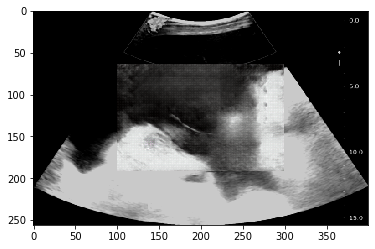

In [253]:
plt.imshow(img_np[0])

In [239]:
pred_centers.size()

torch.Size([2, 3, 128, 200])

In [231]:
pred_centers.min()

tensor(-0.3179, grad_fn=<MinBackward1>)

In [237]:
img_np = tensor2numpy(img)
img_np = min_max(img_np)

center_np = tensor2numpy(center)
center_np = min_max(center_np)

In [236]:
pred_centers = generator(img)  
pred_center_np = tensor2numpy(pred_centers)
pred_center_np = min_max(pred_center_np)

In [228]:
ori_img = img_np[0].copy()
pred_img = img_np[0].copy()
h,w = ori_img.shape[0], ori_img.shape[1]

ori_img[h//4:(h*3//4), w//4:(w*3//4),:] = center_np[0]
pred_img[h//4:(h*3//4), w//4:(w*3//4),:] = pred_center_np[0]

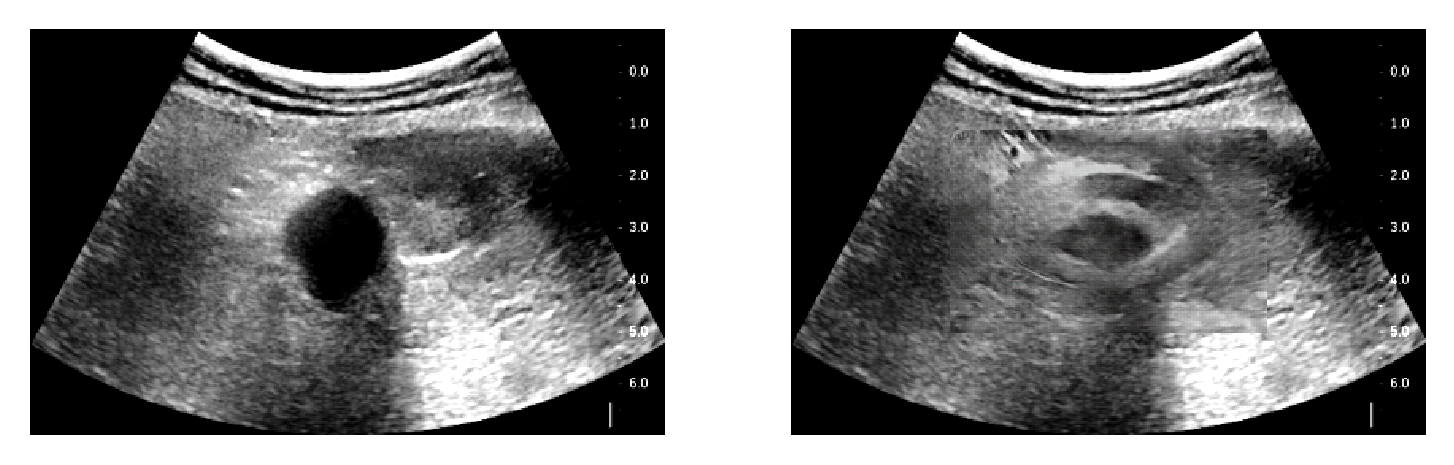

In [229]:
fig, axes = plt.subplots(ncols=2, dpi = 300)
axes[0].imshow(ori_img)
axes[1].imshow(pred_img)
[ax.set_axis_off() for ax in axes]
plt.show()